In [3]:
import seaborn as sns
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [24]:
#this is where all downladed data exists (after extracting the zip file)

#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' / 'pilot_same_day' #this is relational, assuming that this file runs from the analysis folder. 

# total number of batches to enter into the anaylsis
total_batches = [6,7]

In [25]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'batch {batch}'/filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_valid_subjects = pd.concat([all_valid_subjects,file])

In [26]:
#loading all oneline per participant (both qualificed and non qualified)
filename = 'one_line_per_participant_all_info_all_subject.csv'
all_subjects = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'batch {batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects = pd.concat([all_subjects,file])

In [27]:
all_valid_subjects.shape

(23, 19)

In [28]:
all_valid_subjects[['testing_Test_overall_accuracy','testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']]

,testing_Test_overall_accuracy,testing_layer_1_accuracy,testing_layer_2_accuracy,testing_layer_3_accuracy
A10FSZLB75VZ14,0.733333,0.75,0.75,0.70
AXTIQHZSLC0FE,0.883333,0.95,0.90,0.80
ARIWYNIH12MLF,0.650000,0.70,0.70,0.55
A3J4YYW1M62T39,0.750000,0.85,0.75,0.65
AH7Z2M3KSQ4DW,0.650000,0.75,0.60,0.60
A37R0JYAB3QEX9,0.800000,0.85,0.90,0.65
A222GZB608T1B8,0.683333,0.85,0.75,0.45
A2HJKL3641S7R,0.633333,0.85,0.70,0.35
A3KXM8LSH21DYR,0.716667,0.75,0.55,0.85
A1ENQOWFVY6FX9,0.733333,0.75,0.70,0.75


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(510.4494949494949, 0.5, 'RT')

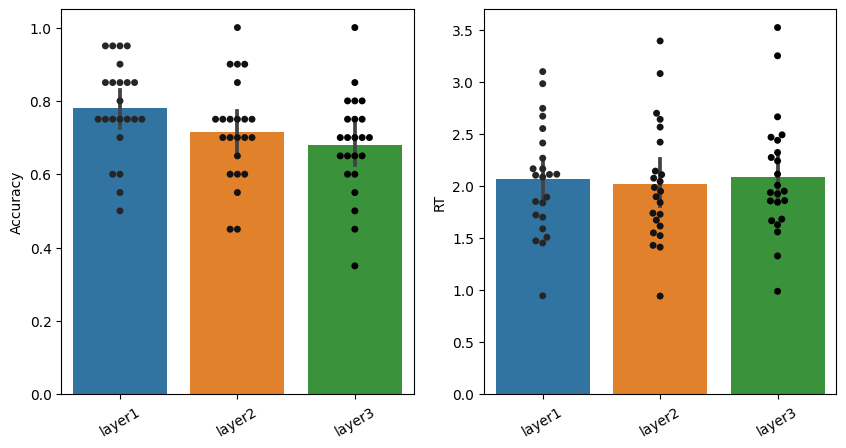

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')

sns.barplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1])
sns.swarmplot(data=all_valid_subjects[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']],ax=axes[1],color='k')

axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].set_ylabel('RT')

In [30]:
all_valid_subjects

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,testing_Test_overall_accuracy,testing_RT_overall_mean,testing_RT_incorrect_mean,testing_RT_correct_mean,testing_layer_1_rt,testing_layer_1_accuracy,testing_layer_2_rt,testing_layer_2_accuracy,testing_layer_3_rt,testing_layer_3_accuracy,testing_longest_response_strike
A10FSZLB75VZ14,1.13500,1.0,1.000000,2.023400,NaN,2.023400,1.214075,0.8,0.733333,1.933766,1.916862,2.291180,1.849830,0.75,1.727285,0.75,2.239468,0.70,8.0
AXTIQHZSLC0FE,2.72110,1.0,0.666667,3.792517,3.118550,4.129500,1.957760,1.0,0.883333,2.995050,3.955971,2.868136,3.097230,0.95,2.639020,0.90,3.248900,0.80,7.0
ARIWYNIH12MLF,2.09820,1.0,0.833333,2.216733,2.770200,2.106040,0.691760,1.0,0.650000,1.448050,1.339800,1.506338,1.587505,0.70,1.428970,0.70,1.327675,0.55,4.0
A3J4YYW1M62T39,0.99620,1.0,0.833333,1.762317,1.901600,1.734460,1.035640,1.0,0.750000,1.578678,1.547613,1.589033,1.506295,0.85,1.548585,0.75,1.681155,0.65,3.0
AH7Z2M3KSQ4DW,0.69230,1.0,0.500000,1.680367,2.460633,0.900100,0.733120,1.0,0.650000,2.056142,2.326981,1.910305,2.109695,0.75,1.738210,0.60,2.320520,0.60,6.0
A37R0JYAB3QEX9,0.64040,1.0,0.833333,1.569517,1.932500,1.496920,0.615875,0.8,0.800000,1.754395,1.806125,1.741462,1.699485,0.85,1.614240,0.90,1.949460,0.65,6.0
A222GZB608T1B8,2.19120,1.0,0.500000,2.101483,2.188300,2.014667,1.884040,1.0,0.683333,2.636753,2.618768,2.645088,2.550260,0.85,2.697195,0.75,2.662805,0.45,9.0
A2HJKL3641S7R,2.23900,1.0,1.000000,2.988000,NaN,2.988000,1.705750,0.8,0.633333,2.770800,2.681364,2.822579,2.744400,0.85,3.077950,0.70,2.490050,0.35,4.0
A3KXM8LSH21DYR,1.70570,1.0,0.833333,2.520417,2.314800,2.561540,1.477300,1.0,0.716667,2.398600,2.685235,2.285279,2.164410,0.75,2.564320,0.55,2.467070,0.85,4.0
A1ENQOWFVY6FX9,2.89573,1.0,0.666667,1.292226,1.855682,1.010498,0.625858,1.0,0.733333,0.958255,1.042234,0.927717,0.944528,0.75,0.942279,0.70,0.987956,0.75,4.0


### ANOVA 

In [31]:
temp = all_valid_subjects[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy','testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']]

df = pd.DataFrame({'patient': np.repeat(temp.index, 3),
                   'layer': np.tile([1, 2,3], temp.shape[0]),
                   'accuracy': temp[['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy']].to_numpy().ravel(),
                    'rt': temp[['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt']].to_numpy().ravel() })

# Conduct the repeated measures ANOVA
print(AnovaRM(data=df, depvar='accuracy',
              subject='patient', within=['layer']).fit())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
layer  4.5640 2.0000 44.0000 0.0158



### CORRELATION 

In [32]:
curr_layer = df[df['layer'] == 1
               ]
curr_layer['accuracy'].corr(curr_layer['rt'])

0.2468444593420547

In [33]:
all_subjects.columns

Index(['demo_arrow_rt', 'demo_arrow_correct', 'demo_demo_accuracy',
       'demo_RT_overall_mean', 'demo_RT_incorrect_mean',
       'demo_RT_correct_mean', 'encoding_arrow_mean_rt',
       'encoding_arrow_accuracy', 'testing_Test_overall_accuracy',
       'testing_RT_overall_mean', 'testing_RT_incorrect_mean',
       'testing_RT_correct_mean', 'testing_layer_1_rt',
       'testing_layer_1_accuracy', 'testing_layer_2_rt',
       'testing_layer_2_accuracy', 'testing_layer_3_rt',
       'testing_layer_3_accuracy', 'testing_longest_response_strike',
       'demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast', 'sufficient_test_acc', 'WorkerId'],
      dtype='object')

### Testing the criterions

In [34]:
criterions=['demo_demo_accuracy.1', 'demo_arrow_correct.1',
       'encoding_arrow_accuracy.1', 'testing_longest_response_strike.1',
       'not_too_slow', 'not_too_Fast']

depvar='testing_Test_overall_accuracy'
for curr_criterion in criterions:
    passed=all_subjects.loc[all_subjects[curr_criterion]]
    failed=all_subjects.loc[~all_subjects[curr_criterion]]
    t,p=stats.ttest_ind(passed[depvar].values,failed[depvar].values)
    print(f'{curr_criterion} TTEST results: t({len(passed),len(failed)}) = {t:.3f}, p = {p:.3f} passed mean: {np.mean(passed[depvar].values):.2f}, failed mean: {np.mean(failed[depvar].values):.2f}')


demo_demo_accuracy.1 TTEST results: t((50, 8)) = 2.512, p = 0.015 passed mean: 0.65, failed mean: 0.54
demo_arrow_correct.1 TTEST results: t((58, 0)) = nan, p = nan passed mean: 0.64, failed mean: nan
encoding_arrow_accuracy.1 TTEST results: t((35, 23)) = 3.783, p = 0.000 passed mean: 0.68, failed mean: 0.57
testing_longest_response_strike.1 TTEST results: t((57, 1)) = nan, p = nan passed mean: 0.64, failed mean: 0.55
not_too_slow TTEST results: t((53, 5)) = -1.082, p = 0.284 passed mean: 0.63, failed mean: 0.69
not_too_Fast TTEST results: t((47, 11)) = 3.196, p = 0.002 passed mean: 0.66, failed mean: 0.54


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value e

read all subjects data in long format - remove the invalid participants and write the code per image: 


In [35]:

#loading all oneline per participant (both qualificed and non qualified)
filename = 'all_subjects_test_df.csv'
all_subjects_long_format = pd.DataFrame([])
for batch in total_batches:
    PATH_PROCESED = PATH_TO_DATA / f'batch {batch}' / filename
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    all_subjects_long_format = pd.concat([all_subjects_long_format,file])

#last: read the encoding so we get a list of all target images to make life easier:
encoding_df=pd.read_csv(PATH_PROCESED.parent / 'all_subjects_encoding_df.csv',index_col=False)
target_images_list=list(encoding_df['target_image'].unique())
target_images_list.remove('left.jpg')
target_images_list.remove('right.jpg')

only_valid_subjects_long_format=all_subjects_long_format.loc[all_subjects_long_format['subject'].apply(lambda x: x in  all_valid_subjects.index)]

In [36]:
#get a list of all distractor images: 
distractor_img_list=list(set(np.unique(all_subjects_long_format[['image1', 'image2']].values.flatten()))-set(target_images_list))
len(distractor_img_list)

180

In [37]:
#collect statistics on target images: 
accuracy_per_img=[]
apearance_per_img=[]
left_accuracies=[]
left_occurences=[]
right_accuracties=[]
right_occurences=[]

for target_img in target_images_list: 
    curr_img_occurences=only_valid_subjects_long_format.loc[(only_valid_subjects_long_format['image1']==target_img) | (only_valid_subjects_long_format['image2']==target_img)]
    accuracy_per_img.append(curr_img_occurences['test_test_response.corr'].sum()/curr_img_occurences['test_test_response.corr'].count())
    apearance_per_img.append(curr_img_occurences['test_test_response.corr'].count())
    left_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][0]
    left_accuracies.append(left_success)
    left_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[0][1])




    right_success=curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][0]
    right_accuracties.append(right_success)
    right_occurences.append(curr_img_occurences.groupby('correct').aggregate({'test_test_response.corr':['mean','count']}).values[1][1])

images_behavior_df=pd.DataFrame(data={'overall_accuracy':accuracy_per_img,'left_occurence':left_occurences,'accuracy_when_left':left_accuracies,'right_occurence':right_occurences,'accuracy_when_right':right_accuracties},index=target_images_list)


<AxesSubplot: >

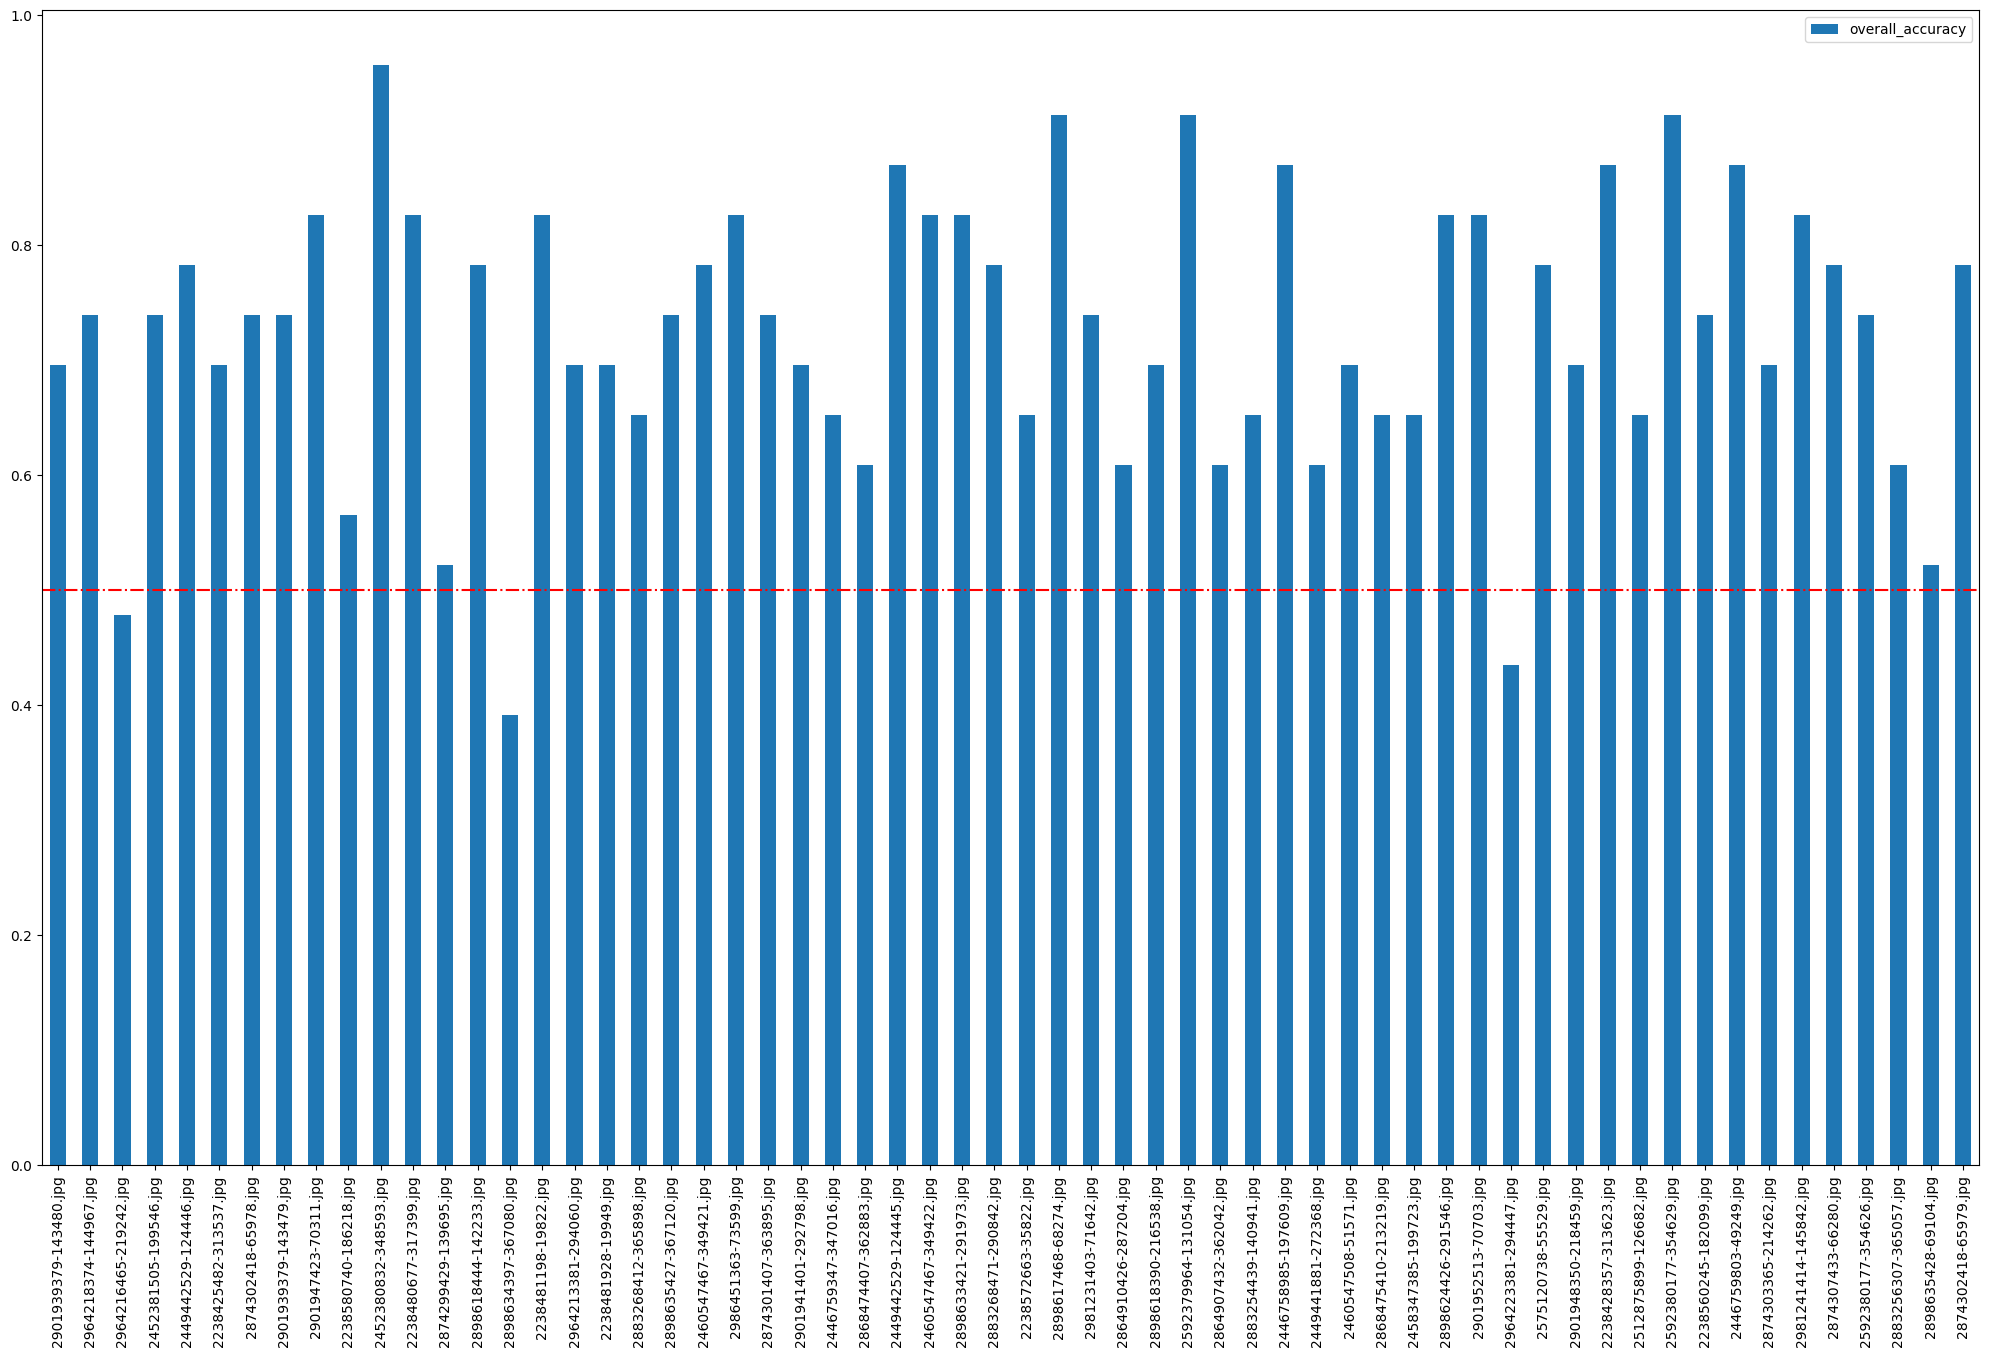

In [38]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
axes.axhline(y=0.5, color='r', linestyle='-.')
images_behavior_df.plot(kind='bar',y=['overall_accuracy'],ax=axes)


In [39]:
#collecft statistics on distractor images: 
accuracy_per_distractor_img=[]
counts_per_distractor_img=[]


for target_img in distractor_img_list: 
    curr_img_occurences=only_valid_subjects_long_format.loc[(only_valid_subjects_long_format['image1']==target_img) | (only_valid_subjects_long_format['image2']==target_img)]
    accuracy_per_distractor_img.append(curr_img_occurences['test_test_response.corr'].sum()/curr_img_occurences['test_test_response.corr'].count())
    counts_per_distractor_img.append(curr_img_occurences['test_test_response.corr'].count())

distractor_images_behavior_df=pd.DataFrame(data={'overall_accuracy':accuracy_per_distractor_img,'occurence':counts_per_distractor_img},index=distractor_img_list)


<AxesSubplot: >

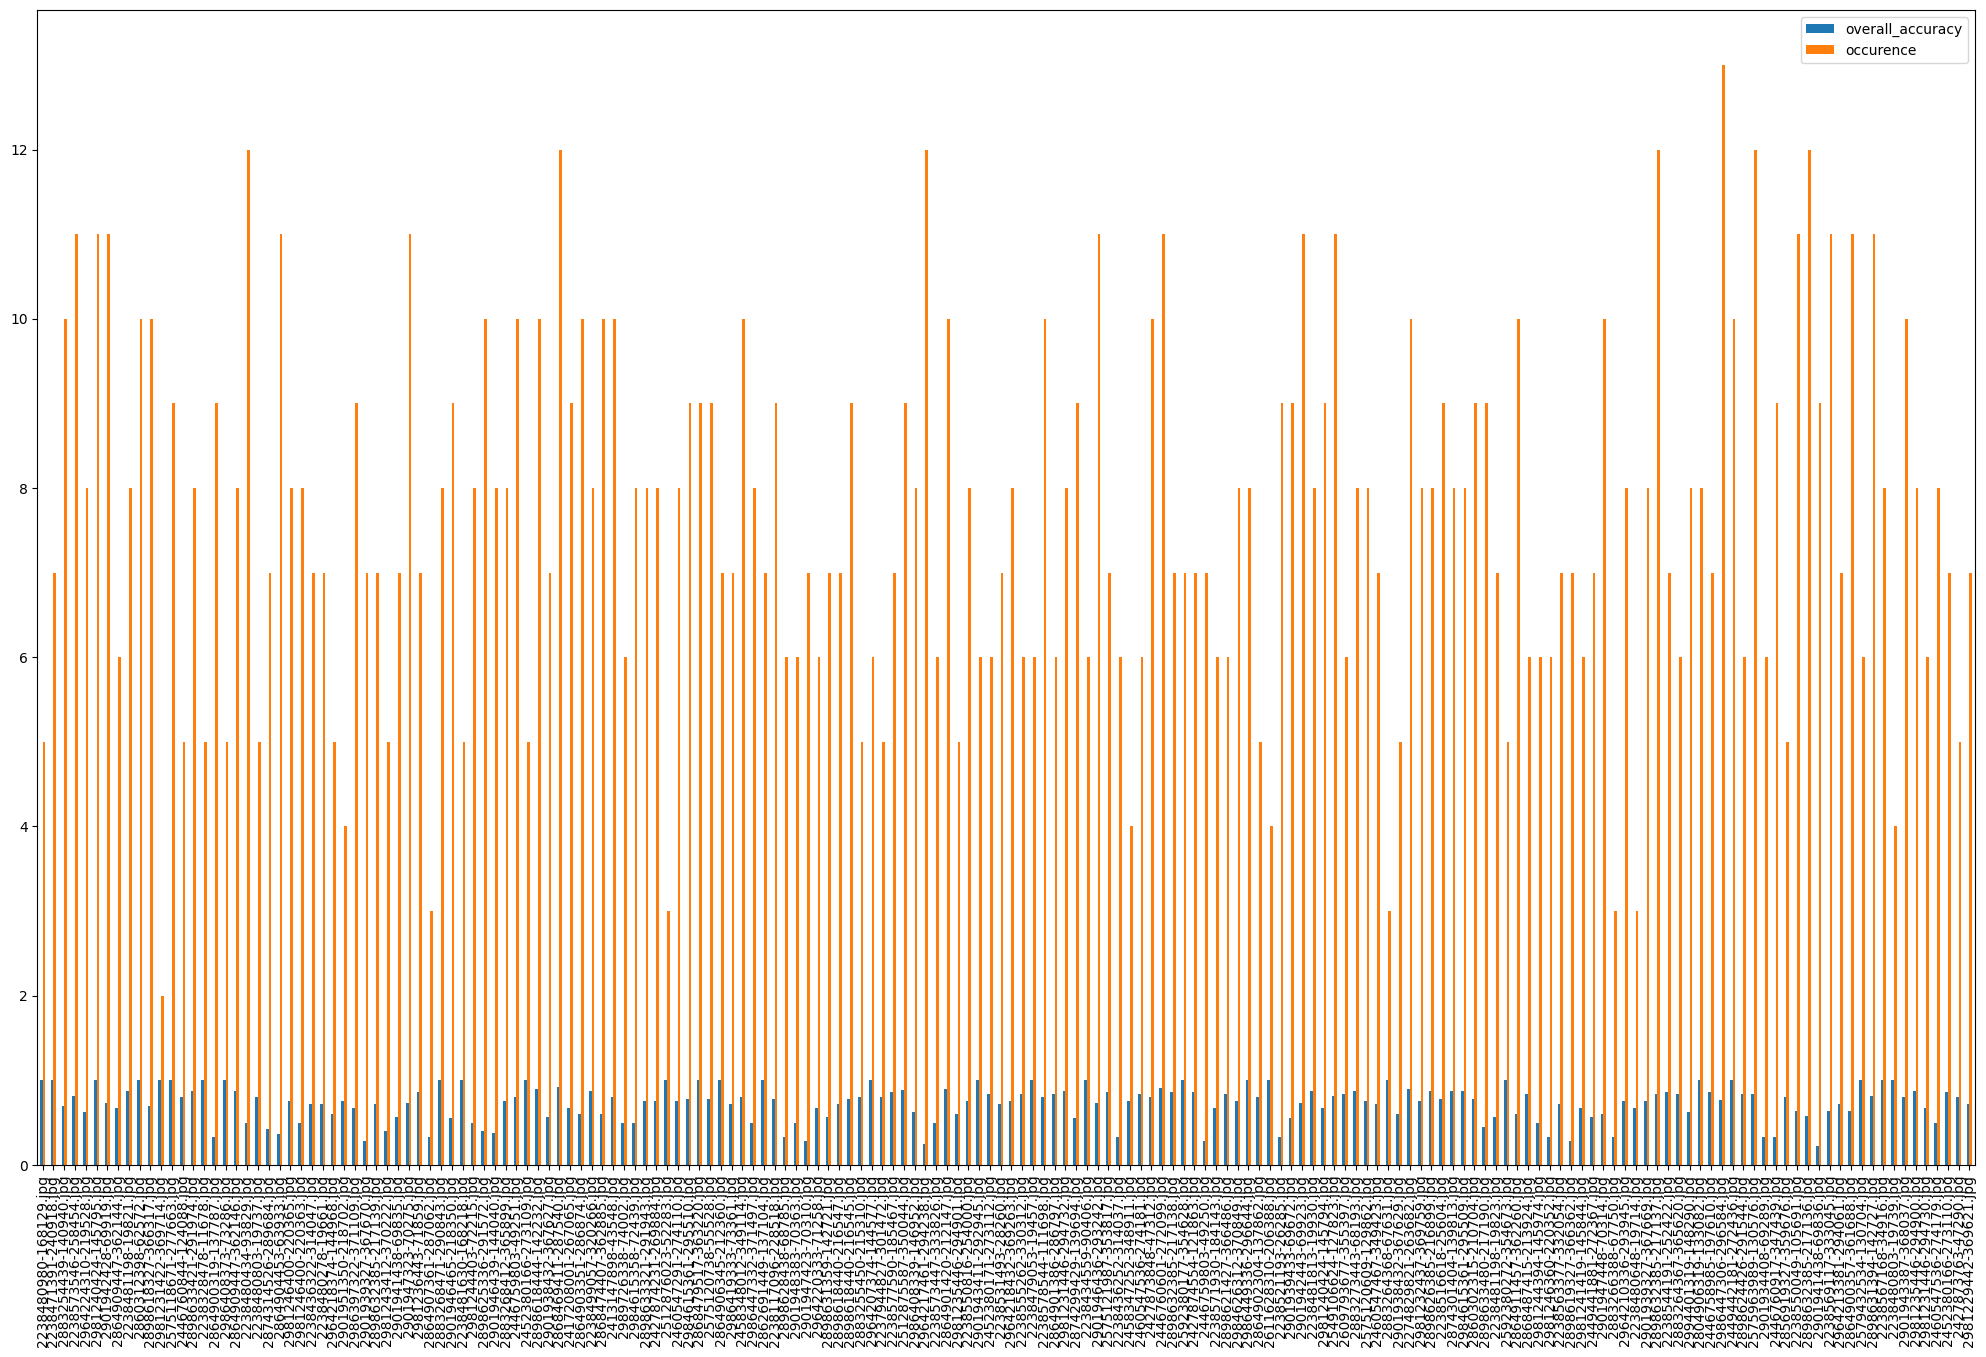

In [40]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
distractor_images_behavior_df.plot(kind='bar',y=['overall_accuracy','occurence'],ax=axes)
